# cited by

using data from Scopus (access required), manually exported to a bibtex file.

In [6]:
import bibtexparser as bib

In [7]:
import crossrefexp as exp

In [12]:
datafile = 'data/citing_Nye1953_journals_short.bib'

In [13]:
with open(datafile) as bibtex_file:
    bibdata = bib.load(bibtex_file)

doi_list = [  entry['doi'] for entry in bibdata.entries ]

In [14]:
doi_list

['10.1016/j.matdes.2018.04.040',
 '10.1016/j.scriptamat.2018.05.020',
 '10.1016/j.actamat.2018.05.022',
 '10.1016/j.ijfatigue.2018.03.030',
 '10.1016/j.ijplas.2018.01.014',
 '10.1016/j.msea.2018.05.028',
 '10.1016/j.commatsci.2018.02.058']

In [15]:
store = exp.MetaDataStore('data/citeby.pickle')

default pickle location set to data/citeby.pickle


Requesing 7 metadata:..
Query performed in 0.601328 s. (7 doi)
7 metadata returned for 7 asked
data/citeby.pickle saved.
growth achieved - 7 nodes in the graph. The last generation number is 0.
growth achieved - 7 nodes in the graph. The last generation number is 0.
graphs/Fanicchia2018Zhang2018Zhu2018Zhang2018Admal2018Zhu2018Kositski2018_gen2_top1.svg  saved


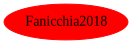

In [16]:
# Build the graph and everything:
gr = store.get_refgraphviz( doi_list, gen=2, top=1, draw_secondary_links=True )
gr

In [17]:
for doi in doi_list:
    print(store.get_info(doi))

Residual stress and adhesion of thermal spray coatings: Microscopic view by...
(2018) Materials & Design
F. Fanicchia, X. Maeder, J. Ast, A.A. Taylor, Y. Guo, M.N. Polyakov, J. Michler, D.A. Axinte
57 references - 0 given and 0 with doi
0 times cited.

Design of non-equiatomic high entropy alloys with heterogeneous lamella str...
(2018) Scripta Materialia
Cheng Zhang, Chaoyi Zhu, Tyler Harrington, Kenneth Vecchio
56 references - 0 given and 0 with doi
0 times cited.

Dislocation-type evolution in quasi-statically compressed polycrystalline n...
(2018) Acta Materialia
Chaoyi Zhu, Tyler Harrington, George T. Gray, Kenneth S. Vecchio
58 references - 0 given and 0 with doi
0 times cited.

Phase morphology, variants and crystallography of alloy microstructures in...
(2018) International Journal of Fatigue
Zhen Zhang, Fionn P.E. Dunne
62 references - 0 given and 0 with doi
1 times cited.

A unified framework for polycrystal plasticity with grain boundary evolutio...
(2018) International Jour

## Retrieving the ref using scopus data
https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/

In [2]:
import requests
import urllib.parse

In [18]:
metadata = bibdata.entries[1]

In [20]:
references = metadata['references'].split(';')
references = [ ref.strip() for ref in references ]
print('\n'.join(references))

Yeh, J.W., Chen, S.K., Lin, S.J., Gan, J.Y., Chin, T.S., Shun, T.T., Tsau, C.H., Chang, S.Y., (2004) Adv. Eng. Mater., 6 (5), p. 299
Cantor, B., Chang, I., Knight, P., Vincent, A., (2004) Mater. Sci. Eng. A, 375, p. 213
Zhang, Y., Zuo, T.T., Tang, Z., Gao, M.C., Dahmen, K.A., Liaw, P.K., Lu, Z.P., (2014) Prog. Mater. Sci., 61, p. 1
Gludovatz, B., Hohenwarter, A., Catoor, D., Chang, E.H., George, E.P., Ritchie, R.O., (2014) Science, 345 (6201), p. 1153
Miracle, D., Senkov, O., (2017) Acta Mater., 122, p. 448
Li, Z., Pradeep, K.G., Deng, Y., Raabe, D., Tasan, C.C., (2016) Nature, 534 (7606), p. 227
Otto, F., Dlouhý, A., Pradeep, K.G., Kuběnová, M., Raabe, D., Eggeler, G., George, E.P., (2016) Acta Mater., 112, p. 40
Tasan, C.C., Deng, Y., Pradeep, K.G., Yao, M., Springer, H., Raabe, D., (2014) JOM, 66 (10), p. 1993
Li, Z., Tasan, C.C., Pradeep, K.G., Raabe, D., (2017) Acta Mater., 131, p. 323
Yao, M., Pradeep, K., Tasan, C., Raabe, D., (2014) Scr. Mater., 72, p. 5
Ma, E., Zhu, T., (2017)

Miracle, D., Senkov, O., (2017) Acta Mater., 122, p. 448


In [49]:
def query_crossref_biblio( ref_text ):
    url = "https://api.crossref.org/works"

    params = {'mailto': 'heelo@marvelusMail.com',
              'query.bibliographic':ref_text}

    response = requests.get(url, params=params)
    
    print( 'Query answered in {:3f} s.'.format( response.elapsed.total_seconds() ) )
    
    r = response.json()
    items = r['message']['items']
    
    sorted_match = sorted( items, key=lambda x:x['score'], reverse=True )
    
    minimum_score = 40


    return sorted_match

In [50]:
ref_text = references[2]
print(ref_text)


sorted_match = query_crossref_biblio( ref_text )

print( [ match['score'] for match in sorted_match[:4] ]  )

best_match = sorted_match[0]
best_match

Zhang, Y., Zuo, T.T., Tang, Z., Gao, M.C., Dahmen, K.A., Liaw, P.K., Lu, Z.P., (2014) Prog. Mater. Sci., 61, p. 1
Query answered in 2.160649 s.
[41.622234, 36.37755, 31.374256, 28.41654]


{'DOI': '10.1016/j.pmatsci.2013.10.001',
 'ISSN': ['0079-6425'],
 'URL': 'http://dx.doi.org/10.1016/j.pmatsci.2013.10.001',
 'alternative-id': ['S0079642513000789'],
 'assertion': [{'label': 'This article is maintained by',
   'name': 'publisher',
   'value': 'Elsevier'},
  {'label': 'Article Title',
   'name': 'articletitle',
   'value': 'Microstructures and properties of high-entropy alloys'},
  {'label': 'Journal Title',
   'name': 'journaltitle',
   'value': 'Progress in Materials Science'},
  {'label': 'CrossRef DOI link to publisher maintained version',
   'name': 'articlelink',
   'value': 'http://dx.doi.org/10.1016/j.pmatsci.2013.10.001'},
  {'label': 'Content Type', 'name': 'content_type', 'value': 'article'},
  {'label': 'Copyright',
   'name': 'copyright',
   'value': 'Copyright © 2013 Elsevier Ltd. Published by Elsevier Ltd. All rights reserved.'}],
 'author': [{'affiliation': [],
   'family': 'Zhang',
   'given': 'Yong',
   'sequence': 'first'},
  {'affiliation': [],
   'f

In [46]:
sorted_match[1]

{'DOI': '10.1007/s11837-013-0776-z',
 'ISSN': ['1047-4838', '1543-1851'],
 'URL': 'http://dx.doi.org/10.1007/s11837-013-0776-z',
 'alternative-id': ['776'],
 'author': [{'affiliation': [],
   'family': 'Tang',
   'given': 'Zhi',
   'sequence': 'first'},
  {'affiliation': [],
   'family': 'Gao',
   'given': 'Michael C.',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Diao',
   'given': 'Haoyan',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Yang',
   'given': 'Tengfei',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Liu',
   'given': 'Junpeng',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Zuo',
   'given': 'Tingting',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Zhang',
   'given': 'Yong',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Lu',
   'given': 'Zhaoping',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Cheng',
   'given': 'Yongqiang',
   'sequ

In [57]:
for item in items:
    print(item['score'])

34.021866
32.216164
30.611364
30.238432
30.238432
30.199623
30.147617
30.147617
30.092163
28.986786
28.199787
28.199787
27.746643
27.399408
27.399408
27.399408
27.399408
27.399408
27.399408
27.399408
